In [ ]:
import pandas as pd
#Supongamos que la empresa nos ha pedido realizar varios tipos de análisis interesantes como estos:
1.#Exploración, Detección de Valores Nulos y Análisis de Calidad de Datos, Limpiza.
2.#Análisis de Ventas por País: Determinar cuáles son los países con mayor número de ventas e ingresos. Comparar la cantidad de ventas por país.
3.#Identificación de Productos Populares: Identificar los productos más vendidos o los que generan más ingresos. Análisis de la frecuencia de compra de cada producto.
3.#Análisis de Clientes: Identificar a los clientes más valiosos basándote en el total de compras realizadas.
4.#Análisis Temporal de las Ventas: Análisis de las ventas por meses, días de la semana o incluso horas del día.
6.#Análisis de Devoluciones: Identificar las transacciones con cantidades negativas para analizar devoluciones o errores en la facturación.
7.#graficos: Gráfico de Barras: Ventas por País. Gráfico de Pastel: Participación de Productos en Ventas. Histograma: Distribución de Ventas por Cliente. Gráfico de Líneas: Ventas Mensuales.Gráfico de Líneas: Ventas por Día de la Semana.Gráfico de Dispersión: Total de Compras vs. Frecuencia de Compras de Clientes
#inicio viernes 20 sep 8:00pm fin de analisis sin graficos domingo 25 sep 4:23pm



path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Online_Retail.csv'
retail_data = pd.read_csv(path, encoding='latin-1')

print(retail_data)
print(type(retail_data))
#conocemos los datos y el tipo de datos

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/

In [ ]:
retail_data.info()
#pedimos la información de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#vemos que el type de InvoiceDate es object debemos ponerlo a datetime como debe ser
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data.info()
#efectivamente
retail_data.head()
#pedimos un resumen que el head() por defecto nos da las primeras 5 filas de cada columna

<ipython-input-5-2bcc8d11c4a0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print(retail_data.describe())
#pedimos una descrpcion de los datos de los datos númericos que hay en las columnas

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [ ]:
retail_data.isnull().sum()
#analisamos que columnas possen valores nullos o faltantes

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
retail_data.duplicated().sum()
#debemos conocer tambien cuantos valores hay duplicados

5268

In [ ]:
#hagamos limpieza de datos nullos y duplicados
#en este caso debemos saber como limpiar deacuerdo a lo que nos hemoas planteado analizar desde el principio, para ello vamos a eliminar los nullos de la columna
#CustomerID y sustituir en la columna descrption los datos por Unknown Product, esto nos ayudara a un analisis mas valioso para lo que tenemos
retail_data = retail_data.dropna(subset=['CustomerID'])
retail_data['Description'].fillna('Unknown Product', inplace=True)
print(retail_data.isnull().sum())
print(retail_data.shape)



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(406829, 8)


<ipython-input-9-8547a87bcfa9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Description'].fillna('Unknown Product', inplace=True)


In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#valores únicos de cada columna
unique_values = {col: retail_data[col].unique() for col in retail_data.columns}

for col, values in unique_values.items():
  print(f'Columna: {col}')
  print(f'Número de valores únicos: {len(values)}')
  print(f'Valores únicos: {values[:10]}')
  print('-' * 50)

Columna: InvoiceNo
Número de valores únicos: 22190
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Número de valores únicos: 3684
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Número de valores únicos: 3896
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Número de valores únicos: 436
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

In [ ]:
#ya hemos hecho limpieza, empecemos a buscar lo que queremos


In [ ]:
1. #Análisis de Ventas por País: Determinar cuáles son los países con mayor número de ventas o ingresos. Comparar la cantidad de ventas por país.
unique_values_country = retail_data['Country'].unique()
print(f'Estos son los unicos paises a los que se les han realizado ventas:\n', unique_values_country)
country_counts = retail_data['Country'].value_counts()
print(f'pais con mayor numero de ventas:\n', country_counts)
retail_data.head()


Estos son los unicos paises a los que se les han realizado ventas:
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
pais con mayor numero de ventas:
 Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_data['TotalSales'] = retail_data['Quantity'] * retail_data['UnitPrice']
sales_by_country = retail_data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

print("Países con mayor numero de ingresos:")
print(sales_by_country)

#reino unido pais con mayor número de ingresos y mayores ventas, por el contrario Arabia Saudita es el de menos ventas e ingresos

Países con mayor numero de ingresos:
Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta              

In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Identificación de Productos Populares: Identificar los productos más vendidos y los que generan más ingresos. Análisis de la frecuencia de compra de cada producto.
unique_values_Description = retail_data['Description'].unique()
print(f'productos que se venden:\n', unique_values_Description)
Description_counts = retail_data['Description'].value_counts().sort_values(ascending=False)
print(f'conteo de los productos:\n', Description_counts)




productos que se venden:
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
conteo de los productos:
 Description
WHITE HANGING HEART T-LIGHT HOLDER     2070
REGENCY CAKESTAND 3 TIER               1905
JUMBO BAG RED RETROSPOT                1662
ASSORTED COLOUR BIRD ORNAMENT          1418
PARTY BUNTING                          1416
                                       ... 
NEW BAROQUE B'FLY NECKLACE CRYSTAL        1
GLASS AND PAINTED BEADS BRACELET OL       1
GLASS AND BEADS BRACELET IVORY            1
CROCHET LILAC/RED BEAR KEYRING            1
PINK BAROQUE FLOCK CANDLE HOLDER          1
Name: count, Length: 3896, dtype: int64


In [ ]:
#analizar el producto mas vendido. Agrupar por producto y sumar la cantidad total vendida de cada uno


ventas_por_producto_orden= retail_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()

print("los productos mas vendidos son:\n", ventas_por_producto_orden)


los productos mas vendidos son:
                               Description  Quantity
0       WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
1                 JUMBO BAG RED RETROSPOT     45066
2           ASSORTED COLOUR BIRD ORNAMENT     35314
3      WHITE HANGING HEART T-LIGHT HOLDER     34147
4         PACK OF 72 RETROSPOT CAKE CASES     33409
...                                   ...       ...
3891      PINK POODLE HANGING DECORATION        -12
3892                      CRUK Commission       -16
3893      ASSORTED TUTTI FRUTTI ROUND BOX       -24
3894                             Discount     -1194
3895  ROTATING SILVER ANGELS T-LIGHT HLDR     -1460

[3896 rows x 2 columns]


In [ ]:
cantidad_WHITE_HANGING = (retail_data['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER').sum()
cantidad_WORLD_WAR_2 = (retail_data['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS').sum()
print(f'Cantidad de veces que se repite el producto WORLD WAR 2 GLIDERS ASSTD DESIGNS', cantidad_WORLD_WAR_2)
print(f'por tanto, el producto mas vendido es WORLD WAR 2 GLIDERS ASSTD DESIGNS con 53215 unidades')
print(f'Cantidad de veces que se repite el producto WHITE HANGING HEART T-LIGHT HOLDER', cantidad_WHITE_HANGING)
print(f'por tanto, el producto que mas se repite en la columna Description es WHITE HANGING HEART T-LIGHT HOLDER con 2070 veces')
#lo que puedo analizar es que el producto WORLD WAR 2 GLIDERS ASSTD DESIGNS esta en la columna Descripcion 478 veces y se vendieron 53215 unidades

Cantidad de veces que se repite el producto WORLD WAR 2 GLIDERS ASSTD DESIGNS 478
por tanto, el producto mas vendido es WORLD WAR 2 GLIDERS ASSTD DESIGNS con 53215 unidades
Cantidad de veces que se repite el producto WHITE HANGING HEART T-LIGHT HOLDER 2070
por tanto, el producto que mas se repite en la columna Description es WHITE HANGING HEART T-LIGHT HOLDER con 2070 veces


In [ ]:
#ahora vamos a conocer cual fue el producto que mas ganancias dejó porque son dos cosas muy diferentes
retail_data['RevenueByProduct'] = retail_data['UnitPrice'] * retail_data['Quantity']
revenue_by_product = retail_data.groupby('Description')['RevenueByProduct'].sum().sort_values(ascending=False).reset_index()
print(f'Lista de productos que mas ganancias dejó:\n', revenue_by_product)
retail_data.head()


Lista de productos que mas ganancias dejó:
                              Description  RevenueByProduct
0               REGENCY CAKESTAND 3 TIER         132870.40
1     WHITE HANGING HEART T-LIGHT HOLDER          93823.85
2                JUMBO BAG RED RETROSPOT          83236.76
3                          PARTY BUNTING          67687.53
4                                POSTAGE          66710.24
...                                  ...               ...
3891                 WHITE CHERRY LIGHTS            -54.00
3892        CHALKBOARD KITCHEN ORGANISER            -87.80
3893                            Discount          -5696.22
3894                     CRUK Commission          -7933.43
3895                              Manual         -58385.46

[3896 rows x 2 columns]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,RevenueByProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [ ]:
#Análisis de la frecuencia de compra de cada producto.

In [ ]:
# Analizar la frecuencia de compra de cada producto (contar transacciones únicas)
frequency_by_product = retail_data.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index()

# Cambiar el nombre de la columna para indicar frecuencia de compra
frequency_by_product.columns = ['Description', 'Purchase Frequency']

# Imprimir los productos con mayor frecuencia de compra
print(frequency_by_product)

                             Description  Purchase Frequency
0     WHITE HANGING HEART T-LIGHT HOLDER                2013
1               REGENCY CAKESTAND 3 TIER                1884
2                JUMBO BAG RED RETROSPOT                1643
3                          PARTY BUNTING                1399
4          ASSORTED COLOUR BIRD ORNAMENT                1385
...                                  ...                 ...
3891       PEARL & SHELL 42"NECKL. IVORY                   1
3892     PEARL AND CHERRY QUARTZ BRACLET                   1
3893                PEG BAG APPLE DESIGN                   1
3894          WHITE FRANGIPANI HAIR CLIP                   1
3895       WHITE ROSEBUD  PEARL EARRINGS                   1

[3896 rows x 2 columns]


In [ ]:
3.#Análisis de Clientes: Identificar a los clientes más valiosos basándote en el total de compras realizadas.
valuable_customers = retail_data.groupby('CustomerID')['RevenueByProduct'].sum().sort_values(ascending=False).reset_index()
valuable_customers.columns = ['CustomerID', 'Total Purchases']
print(f'Clientes con mayor valor de compras:\n', valuable_customers)

Clientes con mayor valor de compras:
       CustomerID  Total Purchases
0        14646.0        279489.02
1        18102.0        256438.49
2        17450.0        187482.17
3        14911.0        132572.62
4        12415.0        123725.45
...          ...              ...
4367     12503.0         -1126.00
4368     17603.0         -1165.30
4369     14213.0         -1192.20
4370     15369.0         -1592.49
4371     17448.0         -4287.63

[4372 rows x 2 columns]


In [ ]:
# Contar el número de transacciones únicas realizadas por cada cliente
purchase_frequency = retail_data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index()

# Renombrar columnas para mayor claridad
purchase_frequency.columns = ['CustomerID', 'Purchase Frequency']

# Imprimir los clientes con mayor frecuencia de compra
print(f'El numero de facturas o transaciones que a efectuado cada cliente:\n', purchase_frequency.head(12))


El numero de facturas o transaciones que a efectuado cada cliente:
     CustomerID  Purchase Frequency
0      14911.0                 248
1      12748.0                 224
2      17841.0                 169
3      14606.0                 128
4      13089.0                 118
5      15311.0                 118
6      12971.0                  89
7      14527.0                  86
8      13408.0                  81
9      14646.0                  77
10     16029.0                  76
11     16422.0                  75


In [ ]:
#frecuencia de compra, productos comprados.
# Agrupar por 'CustomerID' y 'Description' y sumar la cantidad total de cada producto comprado por cada cliente
productos_por_cliente = retail_data.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()

# Ordenar por 'CustomerID' en orden ascendente y 'Quantity' en orden descendente
productos_por_cliente = productos_por_cliente.sort_values(['CustomerID', 'Quantity'], ascending=[True, False])

# Imprimir los productos comprados por los clientes, ordenados por mayor cantidad
print(productos_por_cliente.head())



    CustomerID                     Description  Quantity
0      12346.0  MEDIUM CERAMIC TOP STORAGE JAR         0
42     12347.0      ICE CREAM SUNDAE LIP GLOSS       240
1      12347.0    3D DOG PICTURE PLAYING CARDS       126
47     12347.0         MINI PAINT SET VINTAGE        108
64     12347.0              RABBIT NIGHT LIGHT        84


In [ ]:
# Filtrar los registros específicos del cliente y producto donde la cantidad es cero
cliente_12346 = retail_data[(retail_data['CustomerID'] == 12346.0) & (retail_data['Description'] == 'MEDIUM CERAMIC TOP STORAGE JAR')]
print(cliente_12346)

#Al agrupar y sumar, el total se vuelve 0 porque se suman 74,215 y -74,215, resultando en una cantidad neta de 0 para ese producto específico en el caso de este cliente.


      InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
61619 2011-01-18 10:01:00       1.04     12346.0  United Kingdom     77183.6   
61624 2011-01-18 10:17:00       1.04     12346.0  United Kingdom    -77183.6   

       RevenueByProduct  
61619           77183.6  
61624          -77183.6  


In [ ]:
#Análisis Temporal de las Ventas: Análisis de las ventas por año,semestres, meses, días de la semana o incluso horas del día.
retail_data['Year'] = retail_data['InvoiceDate'].dt.year
retail_data['Month'] = retail_data['InvoiceDate'].dt.month
retail_data['Day'] = retail_data['InvoiceDate'].dt.day
retail_data['Hour'] = retail_data['InvoiceDate'].dt.hour
retail_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,RevenueByProduct,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8


In [ ]:
#ventas por año
sales_by_year = retail_data.groupby('Year')['TotalSales'].sum()
sales_by_year

,TotalSales
Year,
2010,554604.020
2011,7745461.794


In [ ]:
sales_by_year_2011 = sales_by_year.loc[2011]
print(f'ventas en el años 2011:', sales_by_year_2011)

ventas en el años 2011: 7745461.794


In [ ]:
#ventas
retail_data['Semester'] = retail_data['Month'].apply(lambda x: 1 if x <= 6 else 2)
sales_by_year_semester = retail_data.groupby(['Year', 'Semester'])['TotalSales'].sum()
sales_by_year_semester = sales_by_year_semester.reset_index()
print('salidas totales de cada año por semesetre del dataset')
sales_by_year_semester


salidas totales de cada año por semesetre del dataset


,Year,Semester,TotalSales
0,2010,2,554604.020
1,2011,1,3173897.231
2,2011,2,4571564.563


In [ ]:
print(retail_data['Year'].unique())
print(retail_data['Semester'].unique())


[2010 2011]
[2 1]


In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,RevenueByProduct,Year,Month,Day,Hour,Semester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8,2


In [ ]:
#analsiis de ventas por meses, días de la semana o incluso horas del día.
sales_by_month_year = retail_data.groupby(['Year', 'Month'])['TotalSales'].sum()

print(sales_by_month_year)

Year  Month
2010  12        554604.020
2011  1         475074.380
      2         436546.150
      3         579964.610
      4         426047.851
      5         648251.080
      6         608013.160
      7         574238.481
      8         616368.000
      9         931440.372
      10        974603.590
      11       1132407.740
      12        342506.380
Name: TotalSales, dtype: float64


In [ ]:
sales_by_month_year_day_hour = retail_data.groupby(['Year', 'Month', 'Day', 'Hour'])['TotalSales'].sum()
sales_by_month_year_day_hour

Year  Month  Day  Hour
2010  12     1    8       1383.81
                  9       7324.24
                  10      5094.33
                  11      4234.16
                  12      7422.42
                           ...   
2011  12     9    8       3581.93
                  9       3176.95
                  10      2867.41
                  11      1801.44
                  12      4132.48
Name: TotalSales, Length: 2893, dtype: float64

In [ ]:
#devoluciones
total_returns = retail_data[retail_data['Quantity'] < 0]
total_returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,RevenueByProduct,Year,Month,Day,Hour,Semester
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,-27.50,2010,12,1,9,2
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,-4.65,2010,12,1,9,2
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,-19.80,2010,12,1,10,2
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,-6.96,2010,12,1,10,2
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,-6.96,2010,12,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,-9.13,2011,12,9,9,2
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,-224.69,2011,12,9,10,2
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,-54.75,2011,12,9,11,2
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,-1.25,2011,12,9,11,2


In [ ]:
total_non_returns = retail_data[retail_data['Quantity'] >= 0].shape[0]
total_non_returns


397924

In [ ]:
sum_cant = 8905 + 397924
print(sum_cant)

406829


In [ ]:
#definir una categoria
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif 20 <= amount < 100:
        return 'Medium'
    else:
        return 'High'

retail_data['AmountCategory'] = retail_data['TotalSales'].apply(categorize_total_amount)

print(retail_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   RevenueByProduct  Year  Month  Day  Hour  Semester AmountCategory  
0             15.30  2010     12    1  

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
total_returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,RevenueByProduct,Year,Month,Day,Hour,Semester
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,-27.50,2010,12,1,9,2
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,-4.65,2010,12,1,9,2
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,-19.80,2010,12,1,10,2
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,-6.96,2010,12,1,10,2
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,-6.96,2010,12,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,-9.13,2011,12,9,9,2
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,-224.69,2011,12,9,10,2
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,-54.75,2011,12,9,11,2
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,-1.25,2011,12,9,11,2


In [ ]:

# Reemplazar NaN con 0 en las columnas relevantes
retail_data['Quantity'] = retail_data['Quantity'].fillna(0)
retail_data['UnitPrice'] = retail_data['UnitPrice'].fillna(0)

# Si deseas reemplazar NaN en todo el DataFrame
# retail_data = retail_data.fillna(0)



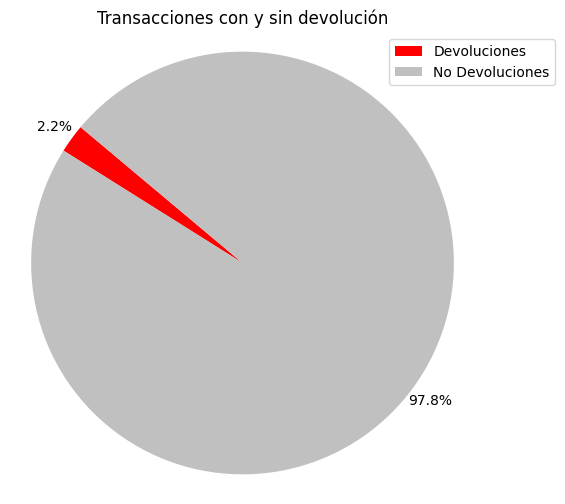

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar devoluciones
total_returns = retail_data[retail_data['Quantity'] < 0]
total_non_returns = retail_data[retail_data['Quantity'] >= 0]
total_devoluciones = len(total_returns)
total_no_devoluciones = len(total_non_returns)

sizes = [total_devoluciones, total_no_devoluciones]
labels = ["Devoluciones", "No Devoluciones"]

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(sizes, startangle=140, colors=['red', '#C0C0C0'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=5)
plt.title('Transacciones con y sin devolución')
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor=(0.8, 1))

plt.show()



In [ ]:
total_devoluciones

8905

In [ ]:
total_no_devoluciones

397924

In [ ]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,RevenueByProduct,Year,Month,Day,Hour,Semester,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010,12,1,8,2,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8,2,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010,12,1,8,2,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8,2,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12,1,8,2,Medium


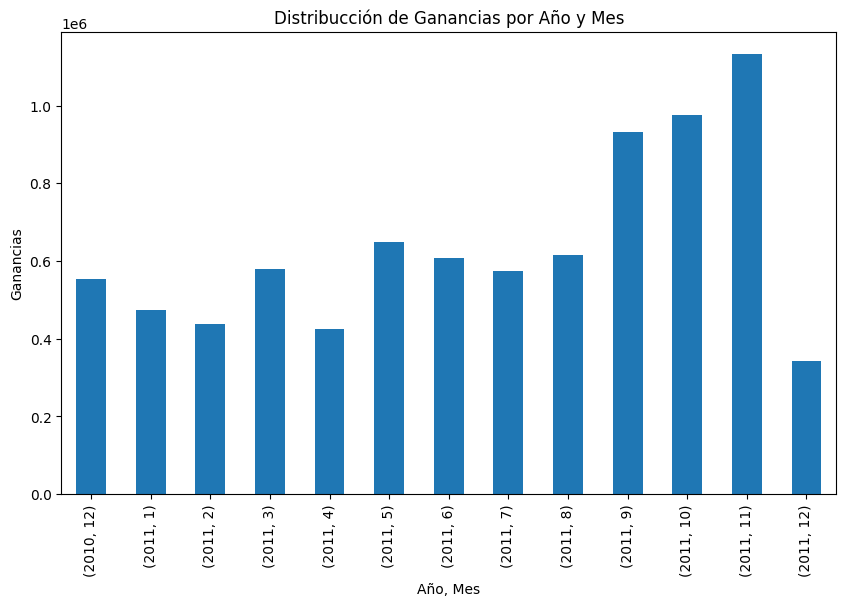

In [ ]:
plt.figure(figsize=(10,6))
retail_data.groupby(['Year', 'Month']) ['RevenueByProduct'].sum().plot(kind='bar')
plt.title('Distribucción de Ganancias por Año y Mes')
plt.xlabel('Año, Mes')
plt.ylabel('Ganancias')
plt.show()


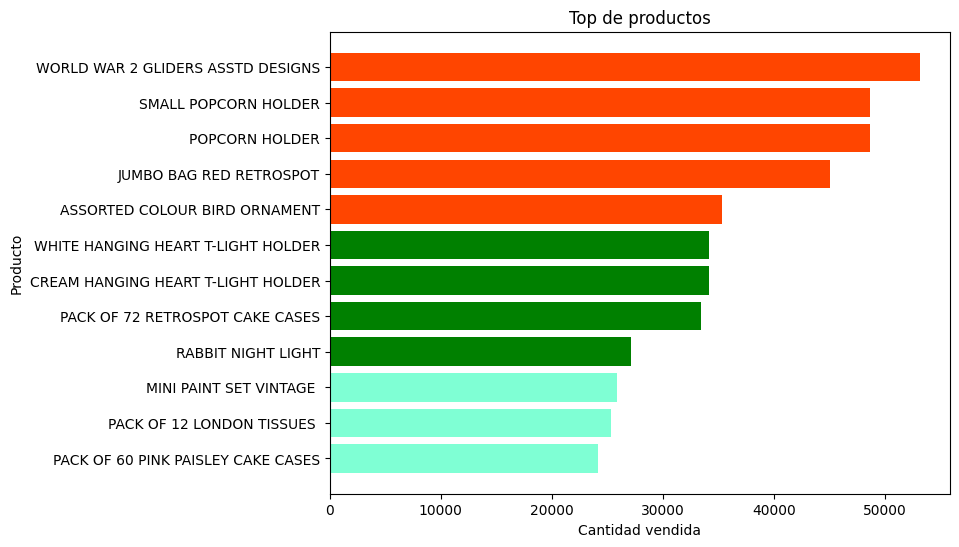

In [ ]:
top_products = retail_data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, retail_data[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')
colors = ['#FF4500'] * 5 + ['green'] * 4 + ['#7FFFD4'] * 3
plt.figure(figsize=(8,6))
plt.barh(top_products['Description'],top_products['Quantity'], color=colors)
plt.title('Top de productos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()


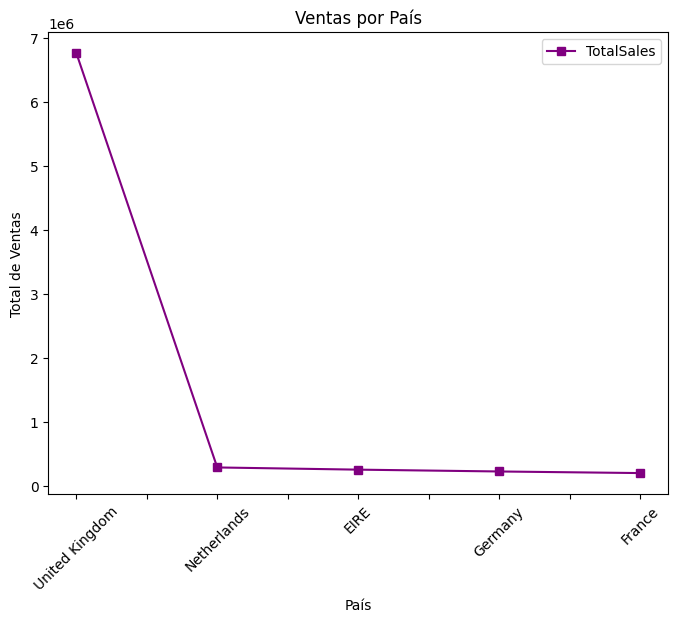

In [ ]:
#determinar la popularidad de los productos en diferentes regiones y a asignar recursos de marketing y ventas de manera más eficiente

total_sales_by_country = retail_data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head()


plt.figure(figsize=(8, 6))
total_sales_by_country.plot(kind='line', marker='s', color='purple')

plt.title('Ventas por País')
plt.xlabel('País')
plt.ylabel('Total de Ventas')
plt.legend()
plt.xticks(rotation=45)

plt.show()


In [ ]:
#Hemos llegado al final mundo. Gracias por su atención.